### Zadanie: kupujemy mieszkanie
Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

Do wykonania powyższego zadania wykorzystaj biblioteki NumPy, NumPy-financial oraz Matplotlib. Odpowiedzi na pytania umieść w Notebooku (jeśli korzystasz) lub w komentarzach w kodzie.

In [14]:
import numpy as np

Dane wstępne:

In [15]:
current_price = 120000
years = 5
price_rate = 0.05
rate = 0.12
freq = 12

Poniżej cena mieszkania za pięć lat przy założeniu 5-procentowego wzrostu cen mieszkań każdego roku
Czyli jest to odpowiedź na 1. pytanie zadania: "Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?"

In [16]:
current_price = current_price*(1 + price_rate)**years
np.round(current_price, -2)

153200.0

Stopa oprocentowania lokaty w ujęciu miesięcznym

In [17]:
rate = rate / freq
rate

0.01

Liczba miesięcznych okresów kapitalizacji odsetek

In [18]:
nper = years * freq
nper

60

Wektor z wszystkimi miesięcznymi okresami kapitalizacji odsetek

In [19]:
periods = np.arange(1,nper+1,dtype=int)
periods

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

Poniżej obliczenia dotyczące 2. punktu zadania:
Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?

Poniżej liczymy mnożnik dla każdej wpłaconej raty, czyli dowiemy się stąd, o ile więcej pieniędzy przyniesie nam każda wpłata do banku, przy każdomiesięcznej kapitalizacji odsetek. Na pierwszej pozycji mamy ostatnią wpłaconą ratę, czyli wpłaconą w 59-tym miesiącu - ona zdąży nam wypracować tylko 1.01, czyli tylko 1% zysku. Na ostatniej pozycji mamy pierwszą wpłaconą ratę, czyli tą która rozpoczęłą całe oszczędzanie na mieszkanie. Ona wypracuje zysk przez 60 miesięcy, czyli (1.01) do potęgi 60, co daje prawie, 1.82, czyli wypracuje nam 82% zysku.

W obliczeniach skorzystano ze wzoru na obliczenie wartości przyszłej:

FV = PV(1 + i)t

FV - wartość przyszła

PV - wartość obecna

i - oprocentowanie w okresie kapitalizacji

t - czas wyrażony w okresach kapitalizacji

(1 + i) jest podnoszone do potęgi t


In [20]:
multiplier = np.zeros(nper) + (1 + rate)**periods
multiplier

array([1.01      , 1.0201    , 1.030301  , 1.04060401, 1.05101005,
       1.06152015, 1.07213535, 1.08285671, 1.09368527, 1.10462213,
       1.11566835, 1.12682503, 1.13809328, 1.14947421, 1.16096896,
       1.17257864, 1.18430443, 1.19614748, 1.20810895, 1.22019004,
       1.23239194, 1.24471586, 1.25716302, 1.26973465, 1.282432  ,
       1.29525631, 1.30820888, 1.32129097, 1.33450388, 1.34784892,
       1.3613274 , 1.37494068, 1.38869009, 1.40257699, 1.41660276,
       1.43076878, 1.44507647, 1.45952724, 1.47412251, 1.48886373,
       1.50375237, 1.51878989, 1.53397779, 1.54931757, 1.56481075,
       1.58045885, 1.59626344, 1.61222608, 1.62834834, 1.64463182,
       1.66107814, 1.67768892, 1.69446581, 1.71141047, 1.72852457,
       1.74580982, 1.76326792, 1.7809006 , 1.7987096 , 1.8166967 ])

Jeśli obliczymy teraz skumulowane wartości to na ostatniej pozycji wektora otrzymamy wartość mnożnika dla wszystkich wpłaconych 60 rat przez okres 5 lat.

In [21]:
multiplier_cumulative = np.cumsum(multiplier)
multiplier_cumulative

array([ 1.01      ,  2.0301    ,  3.060401  ,  4.10100501,  5.15201506,
        6.21353521,  7.28567056,  8.36852727,  9.46221254, 10.56683467,
       11.68250301, 12.80932804, 13.94742132, 15.09689554, 16.25786449,
       17.43044314, 18.61474757, 19.81089504, 21.01900399, 22.23919403,
       23.47158598, 24.71630183, 25.97346485, 27.2431995 , 28.5256315 ,
       29.82088781, 31.12909669, 32.45038766, 33.78489153, 35.13274045,
       36.49406785, 37.86900853, 39.25769862, 40.6602756 , 42.07687836,
       43.50764714, 44.95272361, 46.41225085, 47.88637336, 49.37523709,
       50.87898946, 52.39777936, 53.93175715, 55.48107472, 57.04588547,
       58.62634432, 60.22260777, 61.83483385, 63.46318218, 65.10781401,
       66.76889215, 68.44658107, 70.14104688, 71.85245735, 73.58098192,
       75.32679174, 77.09005966, 78.87096025, 80.66966986, 82.48636655])

Teraz aby dowiedzieć się, ile wynosi rata wpłacana każdego miesiąca na konto oszczędnościowe, aby uzbierać na wymarzone mieszkanie, wystarczy przyszłą wartość mieszkania (za 5 lat) podzielić przez ostatnią wartość z wektora obliczonych skumulowanych mnożników.

In [22]:
payment = np.around(current_price / multiplier_cumulative[-1], 2)
payment

1856.72

3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

Na początek tworzymy wektor pokazujący wzrost wartości lokaty

In [23]:
deposit = np.around(multiplier_cumulative * payment, 2)
deposit

array([  1875.29,   3769.33,   5682.31,   7614.42,   9565.85,  11536.8 ,
        13527.45,  15538.01,  17568.68,  19619.65,  21691.14,  23783.34,
        25896.46,  28030.71,  30186.3 ,  32363.45,  34562.37,  36783.29,
        39026.41,  41291.96,  43580.16,  45891.25,  48225.45,  50582.99,
        52964.11,  55369.04,  57798.02,  60251.28,  62729.08,  65231.66,
        67759.27,  70312.15,  72890.55,  75494.75,  78124.98,  80781.52,
        83464.62,  86174.55,  88911.59,  91675.99,  94468.04,  97288.  ,
       100136.17, 103012.82, 105918.24, 108852.71, 111816.52, 114809.97,
       117833.36, 120886.98, 123971.14, 127086.14, 130232.28, 133409.89,
       136619.28, 139860.76, 143134.66, 146441.29, 149780.99, 153154.09])

Poniżej obliczamy mnożnik comiesięcznego wzrostu wartości mieszkania w przeciągu 5 lat

In [24]:
flat_price = 120000

multiplier_flat = np.zeros(nper) + (1 + price_rate/freq)**periods
multiplier_flat

array([1.00416667, 1.00835069, 1.01255216, 1.01677112, 1.02100767,
       1.02526187, 1.02953379, 1.03382352, 1.03813111, 1.04245666,
       1.04680023, 1.0511619 , 1.05554174, 1.05993983, 1.06435625,
       1.06879106, 1.07324436, 1.07771621, 1.0822067 , 1.08671589,
       1.09124387, 1.09579072, 1.10035652, 1.10494134, 1.10954526,
       1.11416836, 1.11881073, 1.12347244, 1.12815358, 1.13285422,
       1.13757444, 1.14231434, 1.14707398, 1.15185346, 1.15665284,
       1.16147223, 1.1663117 , 1.17117133, 1.17605121, 1.18095142,
       1.18587206, 1.19081319, 1.19577491, 1.20075731, 1.20576046,
       1.21078446, 1.2158294 , 1.22089536, 1.22598242, 1.23109068,
       1.23622022, 1.24137114, 1.24654352, 1.25173745, 1.25695302,
       1.26219033, 1.26744946, 1.2727305 , 1.27803354, 1.28335868])

Poniżej wektor pokazujący wzrost ceny mieszkania w przeciągu najbliższych 5 lat. Rożnica w cenie na koniec wynika z tego, iż na potrzeny wykresu zastosowano miesięczną kapitalizację ceny mieszkania, tak jak dla lokaty, natomiast wcześniej liczono cenę mieszkania, przy założeniu rocznej stopy wzrostu cen mieszkań.

In [26]:
future_flat_price = np.around(multiplier_flat * flat_price, -2)
future_flat_price

array([120500., 121000., 121500., 122000., 122500., 123000., 123500.,
       124100., 124600., 125100., 125600., 126100., 126700., 127200.,
       127700., 128300., 128800., 129300., 129900., 130400., 130900.,
       131500., 132000., 132600., 133100., 133700., 134300., 134800.,
       135400., 135900., 136500., 137100., 137600., 138200., 138800.,
       139400., 140000., 140500., 141100., 141700., 142300., 142900.,
       143500., 144100., 144700., 145300., 145900., 146500., 147100.,
       147700., 148300., 149000., 149600., 150200., 150800., 151500.,
       152100., 152700., 153400., 154000.])

Poniżej wykres liniowy obrazujący wzrost wartości mieszkania i depozytu na przestrzeni 5 lat

Text(0, 0.5, 'Skumulowana wartość odsetek')

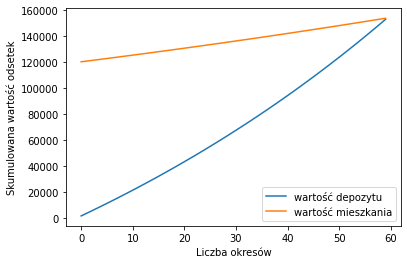

In [17]:
import matplotlib.pyplot as plt

plt.plot(deposit,label='wartość depozytu')
plt.plot(future_flat_price,label='wartość mieszkania')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość odsetek')

Koniec zadania :)